# Cohort Project - DWave Data Set


## Team Notes - Update

1 - Based on the DWave notes (see below) and found paper (note 1) it appears that we have data that provides for solving an Inverse pairwise problem (**team review needed to assist staying on track to what is asked, and not go beyond too soon**)

2 - DWave solves Ising Hamiltonians using an Ising or QUBO solver

3 - We do not have to use the actual DWave QPU to build and test our model, so if we do not yet have a DWave key we can still publish by the deadline. 

4 - One can always sign up on DWave leap to get a free "minute" of computing time (one minute is a lot in Quantum processing)











## DWave README.md content - with notes

# Ising data set
The provided data set is a collection of samples from an Ising Hamiltonian with pairwise interactions.

> [Note 1: see "Faster solutions of the inverse pairwise Ising problem"](https://arxiv.org/abs/0712.2437)


# Files

The following two files are provided:

* Training set: `train_{hashcode}.csv`
* Validation set: `val_{hashcose}.csv`
* List of pair of correlated variables: `correlated_features.csv`

You may use the first file to train a Boltzmann machine and use the second data set to validate the generative model.

# Tasks

1. Generate 10000 samples
2. Ensure the samples are generated from an equilibrated model. What metric do you use to prove equilibrium?
3. Report the mean of each Ising variable
4. Report the mean correlation of pairs of variables listed in `correlated_features.csv`

## Excepts from document from note (1)
Recent work has shown that probabilistic models based on pairwise interactions—in the simplestcase, the Ising model—provide surprisingly accurate descriptions of experiments on real biologicalnetworks ranging from neurons to genes.  **Finding these models requires us to solve an inverse prob-lem:  given experimentally measured expectation values, what are the parameters of the underlyingHamiltonian?**  This problem sits at the intersection of statistical physics and machine learning, andwe suggest that more efficient solutions are possible by merging ideas from the two fields.  We usea combination of recent coordinate descent algorithms with an adaptation of the histogram MonteCarlo method, and implement these techniques to take advantage of the sparseness found in data onreal neurons.  The resulting algorithm learns the parameters of an Ising model describing a networkof forty neurons within a few minutes.  This opens the possibility of analyzing much larger data setsnow emerging, and thus testing hypotheses about the collective behaviors of these networks.

## Ising Hamiltonian

Note 2: Ising describing the state of neurons firing or not

Note 2b: The DWave specializes on the square braket portion of the formula, so modification and adaptation will probably be needed.


>$P(\sigma) = \frac{1}{Z} exp[ - \sum_{i} h_{i}\sigma_{i}^2 - \frac{1}{2} \sum_{i\neq j} J_{ij}\sigma_{i}\sigma_{j}]$

## Inverse Problem 

Note 3: Inverse Problem definition

The inverse problem is to : 
> find the “magnetic fields” ${h_i}$ and “exchange interactions” ${J_{ij}}$ that reproduce the observed values of〈$σ_i$〉and〈$σ_iσ_j$〉

## Current Assessment 

Note 4: If correct, the assessment is that we would use the source data, use RBM to learn it and generate stable samples. Using the pairwise data set, we construct the Ising model for the DWave. We then apply a method (iterative?) to have the DWave propose sets of qubit states for a given Ising set of coefficients. It appears that these coefficients are what we want to generate which solves the Ising for the given data set.

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
%cd "/content/drive/My Drive/Quantum-CDL/ProjectFiles/CohortProject_2020-master/CohortProject_2020-master/Project_1_RBM_and_Tomography"


/content/drive/My Drive/Quantum-CDL/ProjectFiles/CohortProject_2020-master/CohortProject_2020-master/Project_1_RBM_and_Tomography


In [23]:
!pwd
import numpy as np
import torch
from RBM_helper import RBM
import csv
import sys
import importlib
import Plotters
importlib.reload(Plotters)

datapath = '../datasets/IsingSamplesDW/'
sys.path.append(datapath) 
import dwhelper as dw # Need to rename helper because python has a helper.py in the system path


/content/drive/My Drive/Quantum-CDL/ProjectFiles/CohortProject_2020-master/CohortProject_2020-master/Project_1_RBM_and_Tomography


## Load the Training and Validation data from the DWave npz file


In [24]:
training_data, val = dw.load_dataset(datapath + "dataset_x1a46w3557od23s750k9.npz")

In [25]:
train = torch.from_numpy(training_data)
print (train.shape)
print (val.shape)


torch.Size([40000, 2041])
(10000, 2041)


## Load the correlated features csv data

In [26]:
corr_feat = []
with open(datapath+'correlated_features.csv', newline='') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    corr_feat.append(row)

print (len(corr_feat))

#for r in cf:
#  print (r[0],r[1],r[2])



5975


In [27]:

plot_title = f"Frequencies"
plotter = Plotters.XYPlotter(href=None,
                             title=plot_title,
                             x_label="Var",
                             y_label="Freqs")
%matplotlib inline




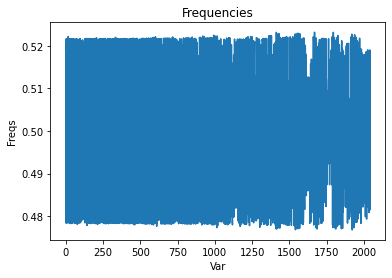

[0.51915, 0.521575, 0.47845, 0.5214, 0.4784, 0.478375, 0.478575, 0.521425, 0.48035, 0.521675, 0.521425, 0.52175, 0.47845, 0.521625, 0.478525, 0.478575, 0.479425, 0.5222, 0.5184, 0.521525, 0.4785, 0.521675, 0.478475, 0.478475, 0.5216, 0.5215, 0.47835, 0.478375, 0.5216, 0.478375, 0.47835, 0.478425, 0.521575, 0.47825, 0.521575, 0.521625, 0.5216, 0.521625, 0.521625, 0.521575, 0.478375, 0.52165, 0.478325, 0.478375, 0.521625, 0.521575, 0.47835, 0.521575, 0.521575, 0.52155, 0.5216, 0.52165, 0.52145, 0.521575, 0.5214, 0.478475, 0.47855, 0.521475, 0.47855, 0.521625, 0.52145, 0.478475, 0.52145, 0.478325, 0.47835, 0.52145, 0.47855, 0.4784, 0.47855, 0.4785, 0.478575, 0.5217, 0.4791, 0.521575, 0.52145, 0.47845, 0.521475, 0.478525, 0.478075, 0.5216, 0.47855, 0.47845, 0.52145, 0.47845, 0.4785, 0.478575, 0.478475, 0.521125, 0.521525, 0.478425, 0.4785, 0.479275, 0.5215, 0.4789, 0.4793, 0.478425, 0.521725, 0.478475, 0.5215, 0.52075, 0.478725, 0.47915, 0.520875, 0.4787, 0.4815, 0.521225, 0.4812, 0.47925,

In [28]:
# Calculate Mean values (just to validate plotter )

ta = np.array(train)
f1 = ta.mean(axis=0)

freqs = f1.tolist()
for i in range(len(freqs)):
  plotter.update(i,freqs[i],redraw_fig=False)
plotter._update_plot()
print(freqs)


In [29]:
n_vis = train.shape[1]
n_hin = 10

print(n_vis,n_hin)

rbm = RBM(n_vis, n_hin)

2041 10


In [30]:
epochs = 500
num_samples = 2000

use_n_samples = min(len(train), 1000)
print("Using %d samples" % use_n_samples)

#diff_thresh = 1e-4

plot_title = f"{n_hin} hidden layers; training with {use_n_samples} samples"
plotter = Plotters.XYPlotter(href=None,
                             title=plot_title,
                             x_label="Epoch",
                             y_label="TBD")
%matplotlib inline




Using 1000 samples


In [32]:
for e in range(1, epochs+1):
    # do one epoch of training
    rbm.train(train[:use_n_samples])   
 
    # now generate samples and calculate the energy
    if e % 10 == 0:
        print("\nEpoch: ", e)
        print("Sampling...")

        init_state = torch.zeros(num_samples, n_vis)
        RBM_samples = rbm.draw_samples(100, init_state)

        print("Done sampling.") 
 
        break # during testing only
        #plotter.update(e, abs(energies.item() - exact_energy))




Epoch:  10
Sampling...
Done sampling.


## Add Code below to process the data

In [ ]:
#BASIC Template code - TO BE MODIFIED
from dwave.system import DWaveSampler, EmbeddingComposite

#Converts the QUBO into a BinaryQuadraticModel and then calls sample().
sampler = EmbeddingComposite(DWaveSampler())

#Example encoding for x0,x1,x2,x4: needs to be generalized based on dataset
Q = {('x0', 'x0'):1, ('x1', 'x1'):1, ('x2', 'x2'):1, ('x3', 'x3'):1, ('x4', 'x4'):1,}

results = sampler.sample_qubo(Q, num_reads=10000)

# print the results
for smpl, energy in results.data(['sample', 'energy']):
    print(smpl, energy)